## 먼저, 이 노트는 "밑바닥부터 시작하는 딥러닝1" 이라는 책을 정리한 노트입니다.

## 퍼셉트론  (참고로 앞으로의 모든 퍼셉트론은 단순 퍼셉트론임에 유의하자!)

- 퍼셉트론은 프랑크 로젠블라트가 1957년 고안한 알고리즘으로 `신경망(딥러닝)의 기원이 되는 알고리즘`이기 때문이다. 그래서 퍼셉트론의 구조를 배우는 것은 신경망과 딥러닝으로 나아가는 데 중요한 아이디어를 배우는 일도 된다.

- 퍼셉트론은 다수의 신호를 입력으로 받아 하나의 신호를 출력한다. 여기서 말하는 신호란 전류나 강물처럼 흐름이 있는 것을 상상하면 좋다. 다만, 실제 전류와 달리 퍼셉트론 신호는 '흐른다/안 흐른다(0 또는 1)'의 두 가지 값을 가질 수 있다. 

- 1 : 신호가 흐른다. 0: 신호가 흐르지 않는다. 

- 퍼셉트론은 복수의 입력 신호 각각에 고유한 가중치를 부여한다. `가중치가 클수록 해당 신호가 그만큼 더 중요함을 뜻한다.`

$$y=\begin{cases}
   0 & w_{1}x_{1} + w_{2}x_{2} \leq \theta \\
   1 & w_{1}x_{1} + w_{2}x_{2}  > \theta
   \end{cases}$$


### 단순한 논리 회로 

- AND 게이트 
- NAND 게이트 : Not AND를 의미하며, AND 게이트를 구현하는 매개변수의 부호를 모두 반전하기만 하면 된다.
- OR 게이트

퍼셉트론으로 AND, NAND, OR 논리 회로를 표현할 수 있다. 여기서 중요한 점은 `똑같은 구조의 퍼셉트론이 매개변수의 값만 적절히 조정하여 AND, NAND, OR로 변신하는 것이다.`

위에서 언급한 각 뉴런의 `가중치들은 입력 신호가 결과에 영향을 주는 영향력(중요도)를 조절하는 매개변수고, 편향은 뉴런이 얼마나 쉽게 활성화(결과로 1을 출력)하느냐를 조정하는 매개변수` 입니다. 

In [1]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    result = x1*w1 + x2*w2
    if result <= theta:
        return 0
    elif result > theta:
        return 1

In [2]:
print(AND(0, 0))
print(AND(1, 0))
print(AND(0, 1))
print(AND(1, 1))

0
0
0
1


In [3]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    result = np.sum(x*w) + b
    if result <= 0:
        return 0
    elif result > 0:
        return 1

In [4]:
print(AND(0, 0))
print(AND(1, 0))
print(AND(0, 1))
print(AND(1, 1))

0
0
0
1


In [5]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5]) 
    b = 0.7
    result = np.sum(x*w) + b
    if result <= 0:
        return 0
    elif result > 0:
        return 1

In [6]:
print(NAND(0, 0))
print(NAND(1, 0))
print(NAND(0, 1))
print(NAND(1, 1))

1
1
1
0


In [7]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5]) 
    b = -0.4
    result = np.sum(x*w) + b
    if result <= 0:
        return 0
    elif result > 0:
        return 1

In [8]:
print(OR(0, 0))
print(OR(1, 0))
print(OR(0, 1))
print(OR(1, 1))

0
1
1
1


### 퍼셉트론의 한계 
- 위의 3가지 논리 회로를 구현할 수 있었지만, XOR 게이트를 생각해보면 퍼셉트론의 한계를 알 수있다.

### XOR 게이트

- XOR 게이트는 배타적 논리합이라는 논리 회로이다. $x_{1}$과 $x_{2}$ 중 한쪽이 1일 때만 1을 출력한다.

지금까지 본 단층 퍼셉트론으로는 이 XOR게이트를 구현할 수 없다. 왜냐하면 `다른 논리회로들과 다르게 직선하나로 나누기가 불가능 하기 때문이다.`
즉, `퍼셉트론은 직선 하나로 나눈 영역만 표현할 수 있다는 한계가 있으며 곡선은 표현할 수 없다는 것이다.`

- 그러나, 단순 퍼셉트론에서 층을 하나 늘려 2층짜리 다층 퍼셉트론을 만들면 XOR문제를 해결할 수 있다!!!
- 1층 : NAND, OR 게이트 , 2층 : AND 게이트

In [9]:
def XOR(x1, x2):
    OR_1 = OR(x1, x2)
    NAND_1 = NAND(x1, x2)
    result = AND(OR_1, NAND_1)
    
    return result 

In [10]:
print(XOR(0, 0))
print(XOR(1, 0))
print(XOR(0, 1))
print(XOR(1, 1))

0
1
1
0


이제 퍼셉트론으로도 복잡한 함수를 표현할 수 있음을 알았다. 허나, 가중치를 설정하는 작업(원하는 결과를 출력하도록 가중치 값을 적절히 정하는 작업)은 여전히 사람이 수동으로 한다는 것이다. 신경망은 이 나쁜 점을 해결해 준다. `가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력이 신경망의 중요한 성질이다.`

### 활성화 함수(activation function)

- 입력 신호의 총합이 활성화를 일으키는지를 정하는 역할을 하며, 활성화되면 출력 신호로 변환하는 함수
- `신경망에서는 활성화 함수로 비선형 함수를 사용해야 한다.` 왜냐하면 선형함수로 하게되면 신경망의 층을 깊게하는 의미가 없어지기 때문이다. 즉, 선형함수의 문제는 층을 아무리 깊게 해도 은닉층이 없는 네트워크로도 똑같은 기능을 할 수 있다는데 있다. `선형함수를 이용해서는 여러 층으로 구성하는 이점을 살릴 수 없다.` 

ex) step, sigmoid, LeRu 함수등...

$$y=h(b + w_{1}x_{1} + w_{2}x_{2})$$

$$h(x)=\begin{cases}
   0 & x \leq 0 \\
   1 & x  > 0
   \end{cases}$$


In [11]:
def step_function(x):
    y = x > 0
    return y.astype("int")

In [12]:
step_function(np.array([1,2,0.5,-0.4]))

array([1, 1, 1, 0])

In [13]:
def sigmoid_function(x):
    return 1/(1+np.exp(-x))

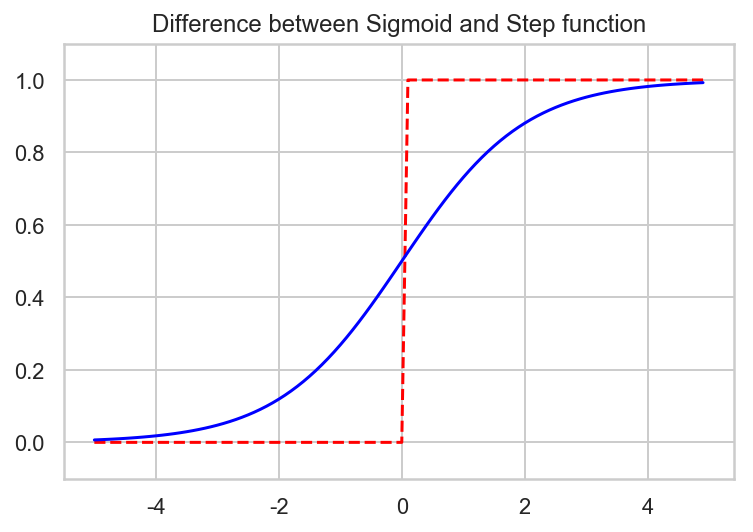

In [14]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(-5, 5, 0.1)
y1 = step_function(x)
y2 = sigmoid_function(x)
plt.plot(x, y1, color="red", linestyle='dashed')
plt.plot(x, y2, color="blue")

plt.title("Difference between Sigmoid and Step function")
plt.ylim(-0.1, 1.1)
plt.show()

- 시그모이드 함수 (Sigmoid function)(파란색)
    - 부드러운 곡선이며 입력에 따라 출력이 연속적으로 변화한다.
- 계단 함수(Step function)(붉은 dash 선)
    - 0과 1중 하나의 값만 돌려주며 0을 기준으로 출력이 바뀐다.
    
- 두 함수의 공통점
    - `두 함수 모두 입력이 중요하면 큰 값을 출력하고 입력이 중요하지 않으면 작인값을 출력한다. 그리고 입력이 아무리 작거나 커도 출력은 0에서 1사이라는 것도 둘의 공통점이다.`

### ReLU function
- 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 함수이다.

$$h(x)=\begin{cases}
   0 & x \leq 0 \\
   x & x  > 0
   \end{cases}$$


In [15]:
def relu(x):
    return np.maximum(0, x)

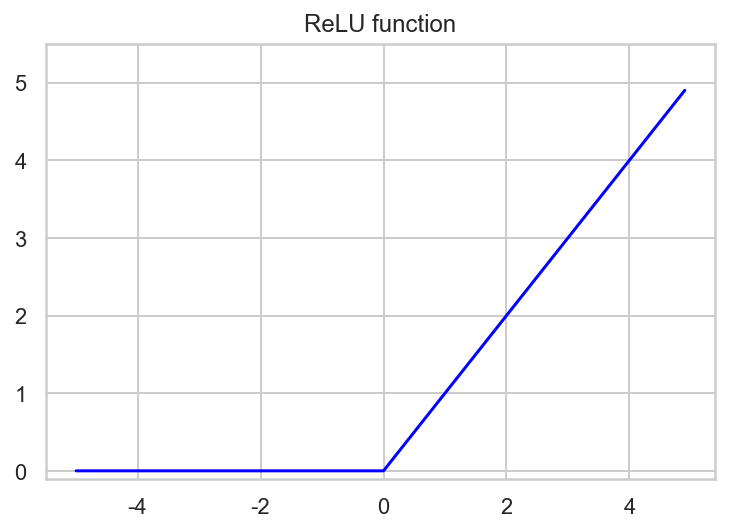

In [16]:
x = np.arange(-5, 5, 0.1)
y = relu(x)
plt.plot(x, y, color="blue")

plt.title("ReLU function")
plt.ylim(-0.1, 5.5)
plt.show()

## 3층 신경망 구현하기

- 출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정한다. 예를들어 회귀(regression)에는 항등 함수(identity function)를, 2클래스 분류에는 시그모이드 함수(Sigmoid function)를, 그리고 다중 클래스 분류에는 소프트맥스 함수(Soft-max function)을 사용하는 것이 일반적이다.

In [17]:
def identity_function(x):
    return x

### 구현정리

In [18]:
def init_network():
    """
    가중치와 편향을 초기화하고 이들을 딕셔너리 변수인 network에 저장
    """
    network = {}
    network["W1"] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network["b1"] = np.array([0.1, 0.2, 0.3])
    network["W2"] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network["b2"] = np.array([0.1, 0.2])
    network["W3"] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network["b3"] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    """
    입력 신호를 출력으로 변환하는 모든 처리 과정을 구현
    """
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid_function(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid_function(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y


network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


### 소프트맥스 함수 
- n은 출력층의 뉴런 수, $y_{k}$는 그중 k번째 출력임을 뜻한다. 분자는 입력신호 $a_{k}$의 지수 함수, 분모는 모든 입력신호의 지수 함수의 합이다.


$$y_{k} =  \frac{exp(a_{k})}{\sum_{i=1}^{n}exp(a_{i})}$$

- softmax함수는 지수 함수를 사용하는데, 지수 함수는 쉽게 아주 큰 값을 내뱉는다. 예를 들어 exp(10) > 20,000이 넘고 exp(1000)은 무한대가 되어 컴퓨터에서는 계산된다. 이런 큰 값끼리 나눗셈을 하면 결과 수치가 불안정 해진다. `overflow문제를 해결하기 위해 다음과 같이 개선한다.`


\begin{align*}
y_{k} = \frac{exp(a_{k})}{\sum_{i=1}^{n}exp(a_{i})}&=\frac{C\exp(a_{k})}{C\sum_{i=1}^{n}exp(a_{i})}\\
&=\frac{exp(a_{k} + log{C})}{\sum_{i=1}^{n}exp(a_{i} + log{C})}\\
&=\frac{exp(a_{k} + C')}{\sum_{i=1}^{n}exp(a_{i} + C'\})}
\end{align*}

- `위의 식은 소프트맥스의 지수 함수를 계산할 때 어떤 정수를 더해도(혹은 뺴도) 결과는 바뀌지 않는다는 것을 말해주고 있다.` $C'\$에 어떤 값을 대입 해도 상관없지만, `오버플로를 막을 목저으로는 입력 신호 중 최대값을 이용하는 것이 일반적이다.`

- 소프트 맥스 함수의 출력은 0에서 1사이의 실수이며 출력의 총합은 1이다. 이 성징 덕분에 확률로 해석할 수 도 있다. `소프트 맥스 함수를 이용함으로써 문제를 확률적(통계적)으로 대응할 수 있게 되는 것이다.` 

- `소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않는다. 왜냐하면 지수함수가 단조 증가함수이기 때문이다.`

- 결과적으로 신경망으로 분류할 때는 출력층의 소프트맥스 함수를 생략해도 된다. 현업에서도 지수 함수 계산에 드는 자원 낭비를 줄이고자 출력층의 소프트맥스 함수는 생략하는 것이 일반적이다. `추론 단계에서는 출력층의 소프트맥스 함수를 생략하는 것이 일반적이지만, 신경망을 학습시킬 때는 출력층에서 소프트맥스 함수를 사용한다.`

In [19]:
def softmax(a):
    
    c = np.max(a)
    exp_a = np.exp(a - c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

## 손글씨 숫자 인식

- mnist 데이터를 통해 이미 학습된 매개변수를 사용하여 학습 과정은 생략하고, 추론 과정만 구현할 것이다. 이 추론 과정을 `신경망의 순전파(forward propagation)`라고도 한다.

- 기계학습과 마찬가지로 신경망도 두 단계를 거쳐 문제를 해결한다. 먼저 훈련 데이터(학습 데이터)를 사용해 가중치 매개변수를 학습하고, 추론 단계에서는 앞서 학습한 매개변수를 사용하여 입력 데이터를 분류한다.

- MNIST 데이터 셋은 0부터 9까지의 숫자 이미지로 구성된다. 훈련이미지가 60,000장 , 시험 이미지가 10,0000장 준비되어 있다. 일반적으로 이 훈련 이미지들을 사용하여 모델을 학습하고, 학습한 모델로 시험 이미지들을 얼마나 정확하게 분류하는지를 평가한다.

- 28x28 크기의 회색조 이미지(1채널)이며, 각 픽셀은 0에서 255까지의 값을 취한다. 각 이미지에는 또한 7, 2, 1과 같이 그 이미지가 실제 의미하는 숫자가 레이블로 붙어있다.


In [20]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    """
    numpy로 저장된 이미지 데이터를 PIL용 데이터 객체로 변환해주는 역할의 함수
    """
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
(x_train, label_train), (x_test, label_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(label_train.shape)
print(x_test.shape)
print(label_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [21]:
img = x_train[0]
label = label_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28) # 위에서 불러올때 flatten하여서 불러왔기에 28x28로 다시 원상복구!!
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


In [26]:
def get_data():
    (x_train, label_train), (x_test, label_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, label_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
        
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid_function(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid_function(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [28]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
        
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


위에서 데이터를 불러오는 작업시에 원래는 0~255 범위인 각 픽셀의 값을 0.0~1.0 범위로 변환해주는 데 `데이터를 특정 범위로 변환하는 처리를 정규화(normalization)라고 한다.` 이것은 pre-processing(전처리) 작업으로 수행한 것인데, 현업에서도 신경망(딥러닝)에 전처리를 활발히 사용한다. `전처리를 통해 식별 능력을 개선하고 학습속도를 높이는 등의 사례가 많이 제시되고 있다.` 표준화(Standardization)이 외에도 `전체 데이터를 균일하게 분포시키는 데이터 백색화(whitening)등도 있다.`

### 배치처리 
- 하나로 묶은 입력 데이터를 `배치(Batch)`라 한다. Batch 처리는 컴퓨터로 계산할 때 큰 이점을 준다. 이미지 1장당 처리 시간을 대폭 줄여주는 것이다. 크게 두 가지 이유가 있다. 하나는 수치 계산 라이브러리 대부분이 큰 배열을 효율적으로 처리할 수 있도록 고도로 최적화되어 있기 때문이다. 그리고 커다란 신경망에서는 데이터 전송이 병목(bottle neck)으로 작용하는 경우가 자주 있는데, Batch 처리를 함으로써 버스에 주는 부하를 줄여준다.(정확히는 느린 I/O를 통해 데이터를 읽는 횟수가 줄어, 빠른 CPU나 GPU로 순수 계산을 수행하는 비율이 높아진다.) `즉, Batch 처리를 수행함으로써 큰 배열로 이뤄진 계산을 하게 되는데, 컴퓨터에서는 큰 배열을 한꺼번에 계산 하는 것이 분할된 작은 배열을 여러번 계산하는 것보다 빠르다.`

In [29]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p==t[i:i+batch_size])
        
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


위에서 처럼 데이터를 Batch로 처리함으로써 효율적이고 빠르게 처리할 수 있다. 